# Bidirectional LSTM
## Version 2 : Glove pre-trained embedding (weights frozen)

## Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from datetime import datetime
from pathlib import Path
import pandas as pd
import random

import torchtext.data as ttd

In [ ]:
from pathlib import Path
folder=Path('/content/gdrive/My Drive/ColabNotebooks')

In [ ]:
import sys
import csv

csv.field_size_limit(sys.maxsize)

131072

In [ ]:
TEXT = ttd.Field(
    sequential=True,
    batch_first=True,
    lower=False,
    tokenize='spacy',
    pad_first=True)

LABEL = ttd.LabelField()
#LABEL = ttd.Field(sequential=False, use_vocab=False, is_target=True)

train_dataset = ttd.TabularDataset(
    path= folder / 'newsgroup20_train.csv',
    format='csv',
    skip_header=True,
    fields=[('data', TEXT), ('label', LABEL)]
)

test_dataset = ttd.TabularDataset(
    path= folder / 'newsgroup20_test.csv',
    format='csv',
    skip_header=True,
    fields=[('data', TEXT), ('label', LABEL)]
)

In [ ]:
SEED=10
train_dataset, valid_dataset = train_dataset.split(random_state = random.seed(SEED)) # default is 0.7

In [ ]:
print(f'Number of training examples: {len(train_dataset)}')
print(f'Number of validation examples: {len(valid_dataset)}')
print(f'Number of testing examples: {len(test_dataset)}')

Number of training examples: 7920
Number of validation examples: 3394
Number of testing examples: 7532


In [ ]:
MAX_VOCAB_SIZE = 25000

TEXT.build_vocab(train_dataset, 
                 max_size = MAX_VOCAB_SIZE, 
                 vectors = "glove.6B.100d", 
                 unk_init = torch.Tensor.normal_)

In [ ]:
LABEL.build_vocab(train_dataset)

In [ ]:
vocab_text = TEXT.vocab

In [ ]:
len(vocab_text)

25002

In [ ]:
vocab_label = LABEL.vocab

In [ ]:
#device = 'cpu'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
train_iter, valid_iter, test_iter = ttd.BucketIterator.splits((train_dataset,valid_dataset,test_dataset), 
                              sort_key=lambda x: len(x.data),
                              #sort_key=None,
                              batch_sizes=(64,256,256), 
                              device=device)

In [ ]:
for batch in train_iter:
  print("inputs:", batch.data, batch.data.shape)
  print("targets:",batch.label, "shape:", batch.label.shape)
  break

inputs: tensor([[   1,    1,    1,  ...,    4,   17,   85],
        [   1,    1,    1,  ..., 2935,  538,    4],
        [   1,    1,    1,  ..., 1298, 2626,   58],
        ...,
        [   1,    1,    1,  ...,  102,  158,    4],
        [   1,    1,    1,  ..., 8067,    0,    4],
        [   1,    1,    1,  ...,  657,  315,    4]], device='cuda:0') torch.Size([64, 2165])
targets: tensor([16, 10, 11, 18,  2, 15, 15,  9, 17, 11,  5, 15, 18, 12,  9,  4, 10, 10,
        12, 13,  4,  4, 12, 16,  0, 12, 15,  0,  2, 15,  7,  9,  2,  3,  5,  1,
         5, 12, 15, 13,  4,  1,  2, 15,  3, 13, 17,  1, 19, 11, 19,  0, 15, 14,
         6,  3, 19, 17, 12,  9, 18, 11,  8,  1], device='cuda:0') shape: torch.Size([64])


In [ ]:
for batch in valid_iter:
  print("inputs:", batch.data, batch.data.shape)
  print("targets:",batch.label, "shape:", batch.label.shape)
  break

inputs: tensor([[   0, 8354,    0,  ..., 3189,  380,  469],
        [  88,  133,  252,  ...,    0,   18,    4],
        [  17,   11,  402,  ...,   33, 8811,    4],
        ...,
        [   1,    1,    1,  ...,    1,    1,    1],
        [   1,    1,    1,  ...,    1,    1,    1],
        [   1,    1,    1,  ...,    1,    1,    1]], device='cuda:0') torch.Size([256, 21])
targets: tensor([12, 15,  3, 13,  0,  1, 11,  3,  4,  6,  4, 13, 10,  7,  1,  4, 18, 14,
        11, 17,  0, 17, 18, 12,  8,  0,  7,  4,  0, 14,  4,  4,  6,  7,  1,  1,
        11,  4, 19, 14,  0,  9,  9,  5,  7, 11,  3,  1, 19,  1, 15, 17, 11,  5,
         1,  9, 13, 18,  5,  1,  8, 12, 18, 15, 14,  1,  8,  3, 12,  1, 16,  9,
         5,  0,  0,  5,  3, 11,  8, 11,  1, 11, 13, 13,  3,  3,  1, 10, 13, 13,
         5, 12,  5,  0,  5,  4, 11, 12, 10,  6, 19, 14,  9,  5, 15,  9, 11, 10,
        17,  7,  5,  9,  1,  1, 13, 10, 12, 16, 11,  6, 15,  4,  3, 12,  9,  6,
         9, 11, 16,  5, 10,  2, 14, 14, 14,  4, 11,  6,  1

In [ ]:
for batch in test_iter:
  print("inputs:", batch.data[0], batch.data[0].shape)
  print("targets:",batch.label, "shape:", batch.label.shape)
  break

inputs: tensor([ 2,  0,  0, 87], device='cuda:0') torch.Size([4])
targets: tensor([ 5, 15, 14,  9,  6, 16,  6,  2,  6,  6,  5,  1, 15, 15, 11, 11,  5,  2,
         6,  5,  5, 12, 19,  7, 10,  1,  6, 19,  4, 12, 17,  4, 17,  6,  1,  3,
        11,  3, 16,  6,  6,  1, 19, 17, 13, 16, 10, 19, 14,  9, 15,  1,  5,  1,
         8, 14, 10, 13, 14, 13, 14,  7,  2,  2, 15,  4,  9,  3, 14,  7, 10,  8,
         1, 16, 10,  6, 19,  4,  7, 16, 12,  2,  7, 16, 10,  2,  9,  9, 11,  4,
        13, 10,  3,  5, 13, 14,  5, 15, 18, 11, 18,  1,  4,  1, 11, 16,  3, 14,
        12,  5,  8,  1, 13,  5, 10,  3, 17, 12,  4, 10,  1, 11,  0,  1,  5,  2,
        13, 14,  4,  9,  8,  0, 10, 11, 11, 11, 14,  7,  8,  8, 15, 13, 10,  4,
        14, 17, 12, 11, 18, 10,  0,  9, 13,  4, 14, 18, 19,  5, 10,  5,  5, 19,
        10, 11, 19,  8,  8,  4,  3, 17, 11, 15,  0, 13,  7,  5,  6,  5, 11,  9,
        15, 10, 14, 15,  7,  5,  2,  5,  2,  2,  1, 12, 15, 14,  0,  5,  5,  4,
         7, 18, 12,  8,  4,  1,  8, 15, 18,  

In [ ]:
# Define the model
class RNN(nn.Module):
  def __init__(self, n_vocab, embed_dim, n_hidden, n_rnnlayers, n_outputs, bidirectional, dropout_rate):
    super(RNN, self).__init__()
    self.V = n_vocab
    self.D = embed_dim
    self.M = n_hidden
    self.K = n_outputs
    self.L = n_rnnlayers
    self.num_diections= bidirectional
    self.dropout_rate=dropout_rate
    
    # embedding layer
    self.embed = nn.Embedding(self.V, self.D)
    
    # rnn layers
    self.rnn = nn.LSTM(
        input_size=self.D,
        hidden_size=self.M,
        num_layers=self.L,
        bidirectional=self.num_diections,
        dropout= self.dropout_rate,
        batch_first=True)
    
    # dense layer
    self.fc = nn.Linear(self.M *2 , self.K)

    # dropout layer
    self.dropout= nn.Dropout(self.dropout_rate)
  
  def forward(self, X):
    # initial hidden states
    h0 = torch.zeros(self.L*2, X.size(0), self.M).to(device)
    c0 = torch.zeros(self.L*2, X.size(0), self.M).to(device)

    # embedding layer
    # turns word indexes into word vectors
    # X (batch_size, sentence length)
    embedding = self.embed(X)   # (batch_size, sentence_length, emd_dim)
    embedding= self.dropout(embedding) # (batch_size, sentence_length, emd_dim)

    # get RNN unit output
    output, (hidden,cell) = self.rnn(embedding, (h0, c0))


    #output = [batch size, sent len, hid dim * num directions]
    #hidden = [num layers * num directions, batch size, hid dim]
    #cell = [num layers * num directions, batch size, hid dim]

    # max pool
    output, _ = torch.max(output, 1)
    output= self.dropout(output)
    # we only want h(T) at the final time step
    output = self.fc(output)
    return output

In [ ]:
n_vocab = len(TEXT.vocab)
embed_dim = 100
n_hidden = 32 
n_rnnlayers = 2
n_outputs =20 
bidirectional = True 
dropout_rate = 0.5 


In [ ]:
model = RNN(n_vocab, embed_dim, n_hidden, n_rnnlayers, n_outputs, bidirectional, dropout_rate)
model.to(device)

RNN(
  (embed): Embedding(25002, 100)
  (rnn): LSTM(100, 32, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=64, out_features=20, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

## Model Summary

In [ ]:
print(model)

RNN(
  (embed): Embedding(25002, 100)
  (rnn): LSTM(100, 32, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=64, out_features=20, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


## Freezing Weights

In [ ]:
for name, param in model.named_parameters():
  if 'fc' not in name:
    param.require_grad = False

## Model Parameters

In [ ]:
for name, param in model.named_parameters():
  print(name, param.shape)

embed.weight torch.Size([25002, 100])
rnn.weight_ih_l0 torch.Size([128, 100])
rnn.weight_hh_l0 torch.Size([128, 32])
rnn.bias_ih_l0 torch.Size([128])
rnn.bias_hh_l0 torch.Size([128])
rnn.weight_ih_l0_reverse torch.Size([128, 100])
rnn.weight_hh_l0_reverse torch.Size([128, 32])
rnn.bias_ih_l0_reverse torch.Size([128])
rnn.bias_hh_l0_reverse torch.Size([128])
rnn.weight_ih_l1 torch.Size([128, 64])
rnn.weight_hh_l1 torch.Size([128, 32])
rnn.bias_ih_l1 torch.Size([128])
rnn.bias_hh_l1 torch.Size([128])
rnn.weight_ih_l1_reverse torch.Size([128, 64])
rnn.weight_hh_l1_reverse torch.Size([128, 32])
rnn.bias_ih_l1_reverse torch.Size([128])
rnn.bias_hh_l1_reverse torch.Size([128])
fc.weight torch.Size([20, 64])
fc.bias torch.Size([20])


In [ ]:
pretrained_embeddings = TEXT.vocab.vectors
print(pretrained_embeddings.shape)

torch.Size([25002, 100])


In [ ]:
model.embed.weight.data.copy_(pretrained_embeddings)

tensor([[-0.3433, -0.8705, -2.2729,  ...,  1.0126,  0.6232,  1.0848],
        [-0.4095, -1.3102, -0.3476,  ...,  1.3361, -0.4185,  0.0371],
        [-2.8075, -0.0816,  0.3201,  ...,  0.3823, -0.1688, -2.1208],
        ...,
        [ 1.1843, -0.9046,  0.0594,  ...,  0.5601, -1.6977, -0.9148],
        [ 0.1288, -0.1809,  0.4796,  ...,  0.6468, -0.4434, -0.0143],
        [ 1.5288, -0.5919, -0.7949,  ...,  0.5387,  0.7500, -0.0615]],
       device='cuda:0')

In [ ]:
unk_idx = TEXT.vocab.stoi[TEXT.unk_token]
pad_idx = TEXT.vocab.stoi[TEXT.pad_token]

model.embed.weight.data[unk_idx] = torch.zeros(embed_dim)
model.embed.weight.data[pad_idx] = torch.zeros(embed_dim)

print(model.embed.weight.data)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-2.8075, -0.0816,  0.3201,  ...,  0.3823, -0.1688, -2.1208],
        ...,
        [ 1.1843, -0.9046,  0.0594,  ...,  0.5601, -1.6977, -0.9148],
        [ 0.1288, -0.1809,  0.4796,  ...,  0.6468, -0.4434, -0.0143],
        [ 1.5288, -0.5919, -0.7949,  ...,  0.5387,  0.7500, -0.0615]],
       device='cuda:0')


## Training Loop

In [ ]:
learning_rate = 0.005
epochs=50
# STEP 5: INSTANTIATE LOSS CLASS
criterion = nn.CrossEntropyLoss()

# STEP 6: INSTANTIATE OPTIMIZER CLASS

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Freeze embedding Layer

#freeze embeddings
model.embed.weight.requires_grad  = False

# STEP 7: TRAIN THE MODEL

train_losses= np.zeros(epochs)
valid_losses= np.zeros(epochs)


for epoch in range(epochs):
  
  t0= datetime.now()
  train_loss=[]
  
  model.train()
  for batch in train_iter:
   
    # forward pass
    output= model(batch.data)
    loss=criterion(output,batch.label)

    # set gradients to zero 
    optimizer.zero_grad()

    # backward pass
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())
  
  train_loss=np.mean(train_loss)
      
  valid_loss=[]
  model.eval()
  with torch.no_grad():
    for batch in valid_iter:
 
      # forward pass
      output= model(batch.data)
      loss=criterion(output,batch.label)
      
      valid_loss.append(loss.item())

    valid_loss=np.mean(valid_loss)
  
  # save Losses
  train_losses[epoch]= train_loss
  valid_losses[epoch]= valid_loss
  dt= datetime.now()-t0
  print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}    Valid Loss: {valid_loss:.4f}, Duration: {dt}')

Epoch 1/50, Train Loss: 2.9838    Valid Loss: 2.9178, Duration: 0:01:36.730866
Epoch 2/50, Train Loss: 2.7630    Valid Loss: 2.4627, Duration: 0:01:35.330984
Epoch 3/50, Train Loss: 2.4645    Valid Loss: 2.2513, Duration: 0:01:38.975972
Epoch 4/50, Train Loss: 2.3317    Valid Loss: 2.1211, Duration: 0:01:37.249646
Epoch 5/50, Train Loss: 2.2428    Valid Loss: 2.0780, Duration: 0:01:35.816402
Epoch 6/50, Train Loss: 2.1854    Valid Loss: 1.9504, Duration: 0:01:39.064594
Epoch 7/50, Train Loss: 2.1290    Valid Loss: 1.9070, Duration: 0:01:40.736726
Epoch 8/50, Train Loss: 2.0724    Valid Loss: 1.8557, Duration: 0:01:34.981368
Epoch 9/50, Train Loss: 2.0417    Valid Loss: 1.8131, Duration: 0:01:35.124994
Epoch 10/50, Train Loss: 2.0223    Valid Loss: 1.8022, Duration: 0:01:36.862959
Epoch 11/50, Train Loss: 1.9774    Valid Loss: 1.7457, Duration: 0:01:31.498635
Epoch 12/50, Train Loss: 1.9466    Valid Loss: 1.6894, Duration: 0:01:38.770785
Epoch 13/50, Train Loss: 1.9235    Valid Loss: 1.

In [ ]:
# Accuracy- write a function to get accuracy
# use this function to get accuracy and print accuracy
def get_accuracy(data_iter, model):
  model.eval()
  with torch.no_grad():
    correct =0 
    total =0
    
    for batch in data_iter:

      output=model(batch.data)
      _,indices = torch.max(output,dim=1)
      correct+= (batch.label==indices).sum().item()
      total += batch.label.shape[0]
    
    acc= correct/total

    return acc

In [ ]:
train_acc = get_accuracy(train_iter, model)
valid_acc = get_accuracy(valid_iter, model)
test_acc = get_accuracy(test_iter ,model)
print(f'Train acc: {train_acc:.4f},\t Valid acc: {valid_acc:.4f},\t Test acc: {test_acc:.4f}')

Train acc: 0.5693,	 Valid acc: 0.5130,	 Test acc: 0.4842


In [ ]:
# Write a function to get predictions

def get_predictions(test_iter, model):
  model.eval()
  with torch.no_grad():
    predictions= np.array([])
    y_test= np.array([])

    for batch in test_iter:
      
      output=model(batch.data)
      _,indices = torch.max(output,dim=1)
      predictions=np.concatenate((predictions,indices.cpu().numpy())) 
      y_test = np.concatenate((y_test,batch.label.cpu().numpy())) 
      
  return y_test, predictions

In [ ]:
y_test, predictions=get_predictions(test_iter, model)

In [ ]:
predictions.max()

19.0

In [ ]:
# Confusion Matrix

cm=confusion_matrix(y_test,predictions)
cm

array([[218,  19,  12,  14,   5,  13,  32,   9,   3,   0,   2,   6,  11,
         18,  21,   0,   0,   5,   1,   0],
       [  8, 259,  15,   0,   1,  24,   0,   5,   0,  53,   0,  11,  11,
          1,   0,   2,   0,   3,   4,   0],
       [ 20,  11, 301,   0,   4,  23,   0,  11,   8,   0,   0,   7,   2,
          1,   0,   0,   0,   6,   2,   0],
       [ 31,  12,   0, 139,   0,  30,   4,  24,   0,   0,   2,   0,  32,
         78,  38,   1,   0,   1,   0,   0],
       [ 21,  10,  34,   0, 206,  36,   3,  23,   6,   0,   0,   8,   6,
          1,   0,  10,   0,  12,  18,   0],
       [ 11,  17,   4,   4,   3, 270,   0,  16,   1,   0,   0,  30,  12,
          7,   0,  11,   0,   8,   2,   0],
       [156,   9,   2,   4,   3,   7, 152,   9,   0,   0,   2,   4,  17,
         10,  19,   0,   0,   1,   0,   0],
       [ 37,  11,  17,  27,   3,  48,   2, 138,   0,   1,   7,  12,  22,
         53,   4,   3,   0,   8,   0,   0],
       [  8,   5,  11,   0,   2,  18,   0,   1, 295,   0,   1,  

In [ ]:
# Write a function to print confusion matrix
# plot confusion matrix
# need to import confusion_matrix from sklearn for this function to work
# need to import seaborn as sns
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true,y_pred,normalize=None):
  cm=confusion_matrix(y_true,y_pred,normalize=normalize)
  fig, ax = plt.subplots(figsize=(6,5))
  if normalize == None:
    fmt='d'
    fig.suptitle('Confusion matrix without Normalization', fontsize=12)
        
  else :
    fmt='0.2f'
    fig.suptitle('Normalized confusion matrix', fontsize=12)
    
  ax=sns.heatmap(cm,cmap=plt.cm.Blues,annot=True,fmt=fmt)
  ax.axhline(y=0, color='k',linewidth=1)
  ax.axhline(y=cm.shape[1], color='k',linewidth=2)
  ax.axvline(x=0, color='k',linewidth=1)
  ax.axvline(x=cm.shape[0], color='k',linewidth=2)
 
  ax.set_xlabel('Predicted label', fontsize=12)
  ax.set_ylabel('True label', fontsize=12)

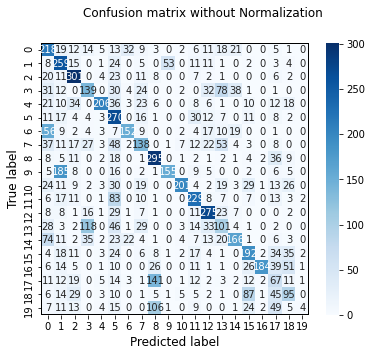

In [ ]:
plot_confusion_matrix(y_test,predictions)